In [8]:
# Import libraries
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Loading data
boston = load_boston()
x = boston.data
y = boston.target

In [3]:
# Split int train and test set
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

In [4]:
# Adaboost object and fitting model
ada_reg = AdaBoostRegressor(n_estimators=100)
ada_reg.fit(xtrain, ytrain)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=None)

In [5]:
# - cross validataion 
scores = cross_val_score(ada_reg, xtrain,ytrain,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())

Mean cross-validataion score: 0.81


In [6]:
# k-fold cross validataion 
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.79


In [9]:
# prediction
ypred = ada_reg.predict(xtest)
mse = mean_squared_error(ytest,ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 30.06
RMSE: 5.48


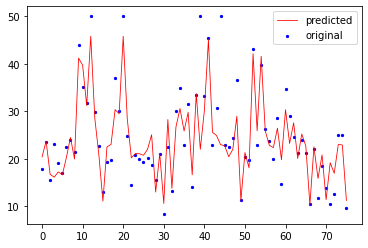

In [10]:
# plotting the result
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()